<font size="3">Project Documentation for Heart Disease Prediction

Introduction

This project aims to develop a predictive model for heart disease using a comprehensive dataset containing various clinical features. The dataset includes key attributes such as age, sex, chest pain type (cp), resting blood pressure (trestbps), cholesterol levels (chol), fasting blood sugar (fbs), resting electrocardiographic results (restecg), maximum heart rate achieved (thalach), exercise angina (exang), depression induced by exercise (oldpeak), slope of the peak exercise ST segment (slope), number of major vessels colored by fluoroscopy (ca), thalassemia (thal), and the target variable indicating the presence of heart disease.

Dataset Features

Age: Age of the patient (in years).

Sex: Gender of the patient (1 = male; 0 = female).

cp (chest pain type): Type of chest pain experienced by the patient (ranging from 0 to 3).

trestbps: Resting blood pressure (in mm Hg).

chol: Serum cholesterol level (in mg/dl).

fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false).

restecg: Results of the resting electrocardiographic test (0, 1, 2).

thalach: Maximum heart rate achieved (in beats per minute).

exang: Exercise induced angina (1 = yes; 0 = no).

oldpeak: ST depression induced by exercise relative to rest.

slope: Slope of the peak exercise ST segment (0, 1, 2).

ca: Number of major vessels colored by fluoroscopy (0-3).

thal: Thalassemia status (1 = normal; 2 = fixed defect; 3 = reversible defect).

target: Presence of heart disease (1 = disease present; 0 = no disease).</font>

<font size="3">Importing Required Libraries

In this section, we import the necessary libraries for data handling, visualization, preprocessing, and building the deep learning model.</font>

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import classification_report , confusion_matrix  , roc_curve, auc 
from sklearn.svm import SVC
from sklearn.neighbors import LocalOutlierFactor
from imblearn.combine import SMOTETomek
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

<font size="3">Loading and Exploring the Dataset

We load the dataset and check its structure, including image dimensions and labels. This helps us understand what kind of data we are working with.</font>

In [21]:
data = pd.read_csv('../datasets/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<font size="3">Exploratory Data Analysis (EDA)

In this section, we check the basic structure of the dataset and look for missing values or abnormal data.</font>

In [22]:
np.unique(data.target , return_counts=True)

(array([0, 1], dtype=int64), array([138, 165], dtype=int64))

In [23]:
data.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [24]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [25]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [26]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<font size="3">Distribution plot of cholesterol levels in patients, illustrating the frequency and variability of cholesterol levels as a risk factor for heart disease.</font>

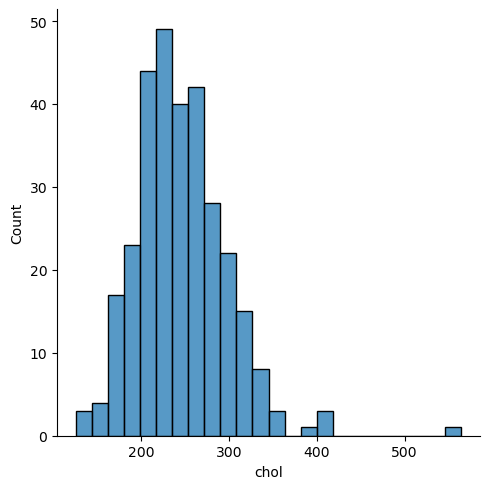

In [27]:
sns.displot(data['chol'])

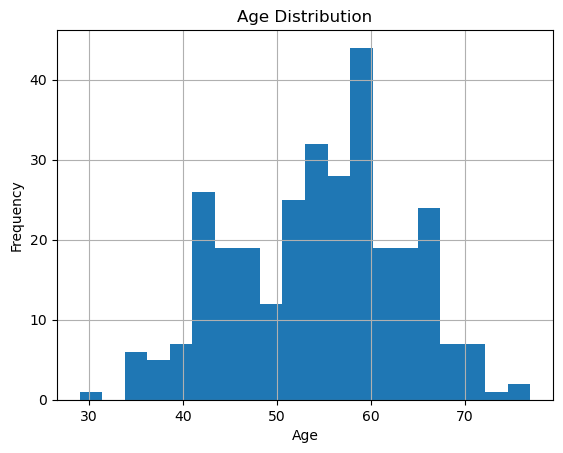

In [28]:
data['age'].hist(bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

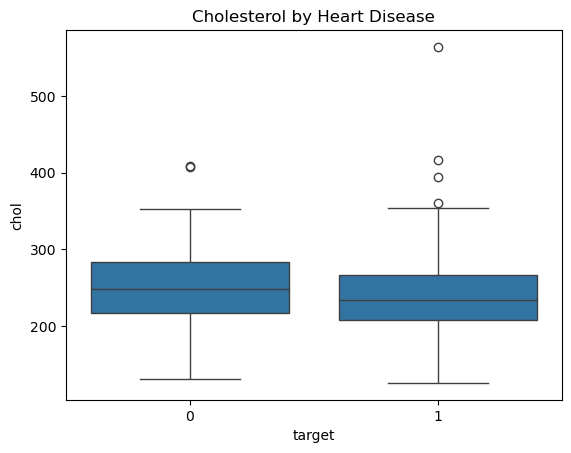

In [29]:
sns.boxplot(x='target', y='chol', data=data)
plt.title('Cholesterol by Heart Disease')
plt.show()

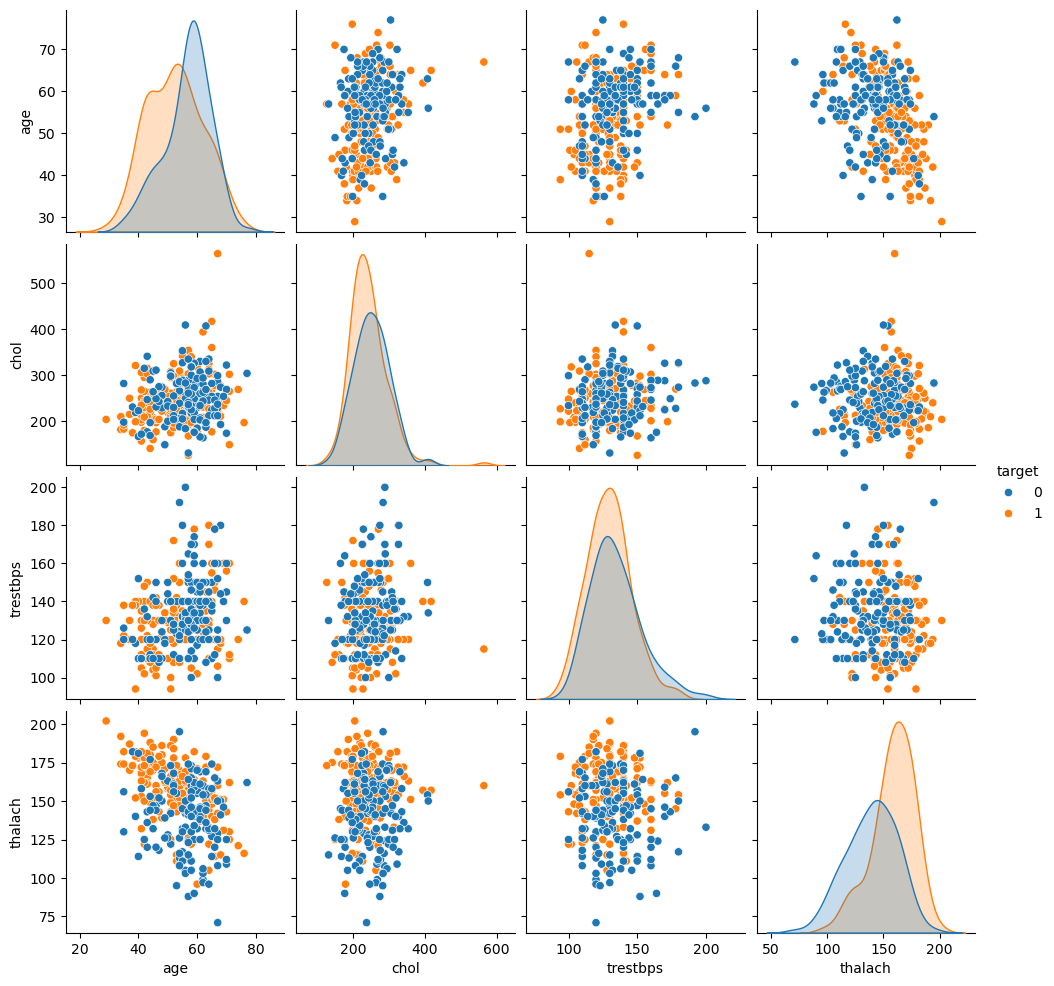

In [30]:
sns.pairplot(data[['age', 'chol', 'trestbps', 'thalach', 'target']], hue='target')
plt.show()

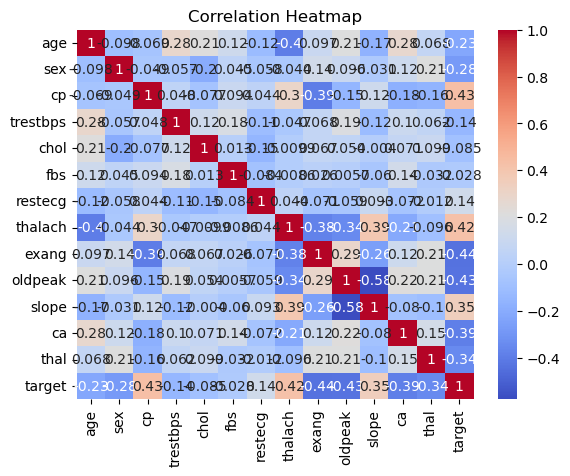

In [31]:
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

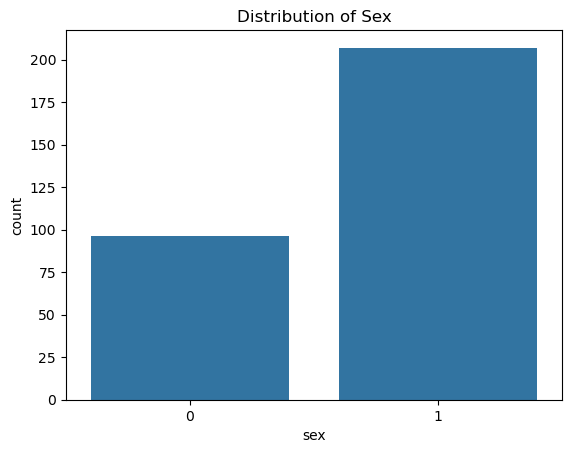

In [32]:
sns.countplot(x='sex', data=data)
plt.title('Distribution of Sex')
plt.show()

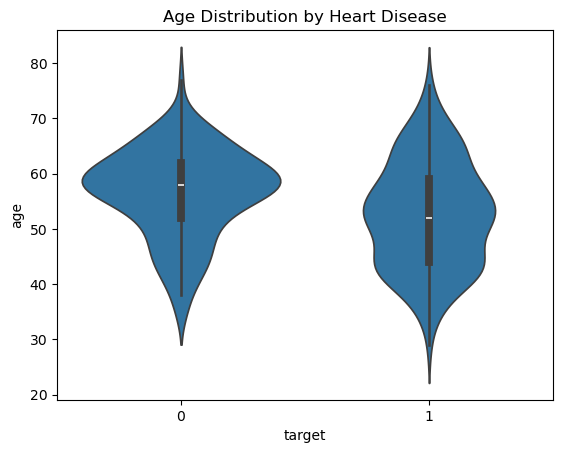

In [33]:
sns.violinplot(x='target', y='age', data=data)
plt.title('Age Distribution by Heart Disease')
plt.show()

<font size="3">Distribution plot of fbs</font>

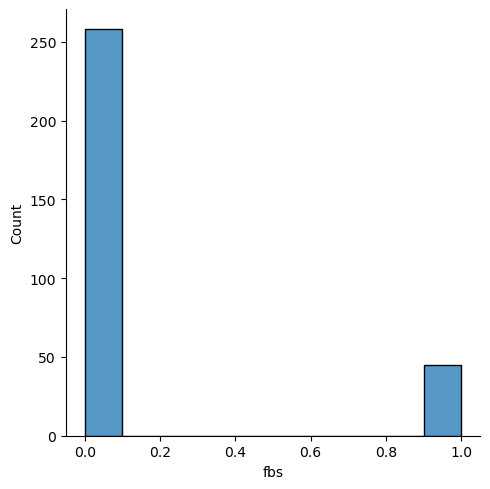

In [34]:
sns.displot(data['fbs'])

In [19]:
# data.drop(columns=['fbs'] , inplace=True)

<font size="3">Scaling Data and Splitting Data into Training and Testing Sets

We split the dataset into training and testing sets using a fixed random seed for reproducibility.</font>

In [41]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
scaler = MinMaxScaler()
x_train , x_test , y_train , y_test = train_test_split(X , y ,test_size=0.25 , random_state=42)

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [42]:
type(x_train)

numpy.ndarray

In [43]:
x_train = pd.DataFrame(x_train , columns = X.columns)
x_test = pd.DataFrame(x_test , columns = X.columns)
type(x_train)

pandas.core.frame.DataFrame

<font size="3">Drop Outlier data</font>

In [44]:
lof = LocalOutlierFactor(n_neighbors=3)
y_pred = lof.fit_predict(x_train)
y_pred[y_pred == -1] = 1
y_pred[y_pred == 1] = 0

In [47]:
x_train[y_pred == 0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.583333,1.0,0.333333,0.612245,0.233256,0.0,0.0,0.666667,0.0,0.000000,1.0,0.25,0.666667
1,0.625000,1.0,0.666667,0.326531,0.200924,1.0,0.5,0.403509,0.0,0.392857,0.5,0.25,0.333333
2,0.791667,1.0,0.000000,0.316327,0.284065,1.0,0.5,0.657895,0.0,0.035714,0.5,0.50,1.000000
3,0.604167,1.0,0.333333,0.316327,0.205543,0.0,0.5,0.491228,0.0,0.071429,0.5,1.00,1.000000
4,0.187500,1.0,0.666667,0.448980,0.101617,0.0,0.5,0.745614,0.0,0.000000,1.0,1.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,0.437500,1.0,0.666667,0.469388,0.235566,0.0,0.5,0.657895,0.0,0.107143,0.5,0.25,1.000000
223,0.458333,1.0,0.666667,0.000000,0.221709,0.0,0.5,0.578947,1.0,0.000000,1.0,0.25,1.000000
224,0.833333,1.0,1.000000,0.673469,0.237875,1.0,0.0,0.377193,0.0,0.017857,0.5,0.25,0.666667
225,0.354167,1.0,0.000000,0.265306,0.272517,0.0,0.0,0.491228,0.0,0.142857,1.0,0.00,1.000000


In [48]:
len(x_train)

227

<font size="3">Balance data with Smotetomek</font>

In [49]:
st = SMOTETomek(random_state=42)
X_smote, y_smote = st.fit_resample(x_train, y_train)
print(len(X_smote) , len(y_smote))

220 220


<font size="3">train test split data</font>

In [50]:
x_train_sm , x_test , y_train_sm , y_test = train_test_split(X_smote , y_smote ,test_size=0.25 , random_state=42)

<font size="3">Gridsearch to find the best hyperparameters for the SVM model</font>

In [51]:
parameter = {'C':np.arange(0.1, 10, 0.1) , 'kernel':['linear' , 'rbf' , 'poly']}
grid_search = GridSearchCV(SVC() , cv=5, param_grid=parameter , scoring='accuracy')
grid_search.fit(x_train_sm , y_train_sm)
print(f'best parames = {grid_search.best_params_}')

best parames = {'C': 5.1, 'kernel': 'poly'}


<font size="3">1)Heart Disease Prediction with SVM algorithm</font>

In [55]:
svc_model = SVC(kernel='poly' , C=5.1)
svc_model.fit(x_train_sm, y_train_sm)
y_pred = svc_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.88      0.80        25
           1       0.88      0.73      0.80        30

    accuracy                           0.80        55
   macro avg       0.81      0.81      0.80        55
weighted avg       0.81      0.80      0.80        55



<font size='3'>Displaying the Confusion Matrix 

In this section, we create and visualize the confusion matrix to assess the performance of our classification model.
The confusion matrix summarizes the true positive, true negative, false positive, and false negative predictions. 
This helps us understand how well the model is performing in distinguishing between fraudulent and non-fraudulent transactions</font>


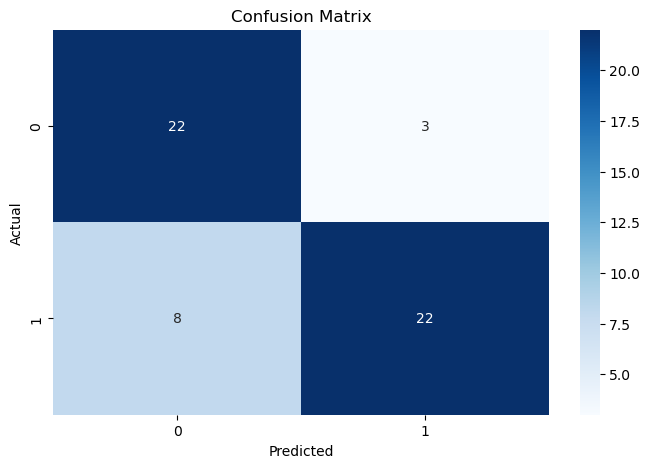

In [57]:
cm = confusion_matrix(y_test , y_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True, fmt='d' , cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<font size="3">2)catboost model</font>

In [61]:
catboost_model = CatBoostClassifier(iterations=300,
                              learning_rate=0.05,
                              depth=4,
                              l2_leaf_reg=2,
                              eval_metric='F1',
                              bagging_temperature = 0.2,
                              od_type='Iter',
                              metric_period = 75,
                              od_wait=100,
                              random_state=42)
catboost_model.fit(x_train_sm, y_train_sm, eval_set=(x_test , y_test), early_stopping_rounds=200)

0:	learn: 0.8609272	test: 0.7586207	best: 0.7586207 (0)	total: 123ms	remaining: 36.6s
75:	learn: 0.9875000	test: 0.8387097	best: 0.8750000 (2)	total: 185ms	remaining: 544ms
150:	learn: 1.0000000	test: 0.8196721	best: 0.8750000 (2)	total: 238ms	remaining: 235ms
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.875
bestIteration = 2

Shrink model to first 3 iterations.


<font size="3">catboost model accuracy on train data</font>

In [63]:
y_pred = catboost_model.predict(x_train_sm)
print(classification_report(y_train_sm, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92        85
           1       0.91      0.93      0.92        80

    accuracy                           0.92       165
   macro avg       0.92      0.92      0.92       165
weighted avg       0.92      0.92      0.92       165



<font size="3">catboost model accuracy on test data</font>

In [64]:
y_pred = catboost_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.76      0.83        25
           1       0.82      0.93      0.87        30

    accuracy                           0.85        55
   macro avg       0.86      0.85      0.85        55
weighted avg       0.86      0.85      0.85        55



<font size="3">confusion matrix</font>

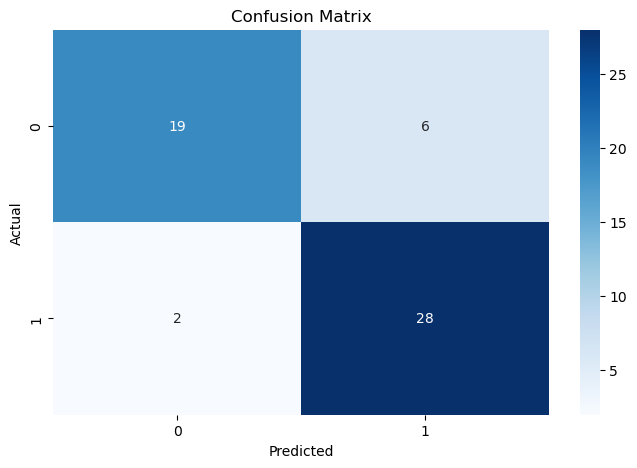

In [65]:
cm = confusion_matrix(y_test , y_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True, fmt='d' , cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<font size="3">cross validation</font>

In [66]:
cv_scores  = cross_val_score(catboost_model , x_train_sm , y_train_sm , cv=5 , scoring='f1')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

0:	learn: 0.8800000	total: 1.14ms	remaining: 340ms
75:	learn: 0.9921260	total: 66.8ms	remaining: 197ms
150:	learn: 1.0000000	total: 114ms	remaining: 113ms
225:	learn: 1.0000000	total: 162ms	remaining: 53ms
299:	learn: 1.0000000	total: 208ms	remaining: 0us
0:	learn: 0.8547009	total: 780us	remaining: 233ms
75:	learn: 0.9843750	total: 50ms	remaining: 147ms
150:	learn: 1.0000000	total: 97.6ms	remaining: 96.3ms
225:	learn: 1.0000000	total: 146ms	remaining: 47.8ms
299:	learn: 1.0000000	total: 193ms	remaining: 0us
0:	learn: 0.8960000	total: 847us	remaining: 253ms
75:	learn: 0.9922481	total: 48.4ms	remaining: 143ms
150:	learn: 1.0000000	total: 95.7ms	remaining: 94.5ms
225:	learn: 1.0000000	total: 142ms	remaining: 46.4ms
299:	learn: 1.0000000	total: 187ms	remaining: 0us
0:	learn: 0.8907563	total: 704us	remaining: 211ms
75:	learn: 0.9846154	total: 44.4ms	remaining: 131ms
150:	learn: 1.0000000	total: 88.4ms	remaining: 87.2ms
225:	learn: 1.0000000	total: 131ms	remaining: 42.8ms
299:	learn: 1.00000

<font size="3">Visualize Importance:

 Plot the feature importance</font>

Text(0.5, 1.0, 'feature importance in random forest model')

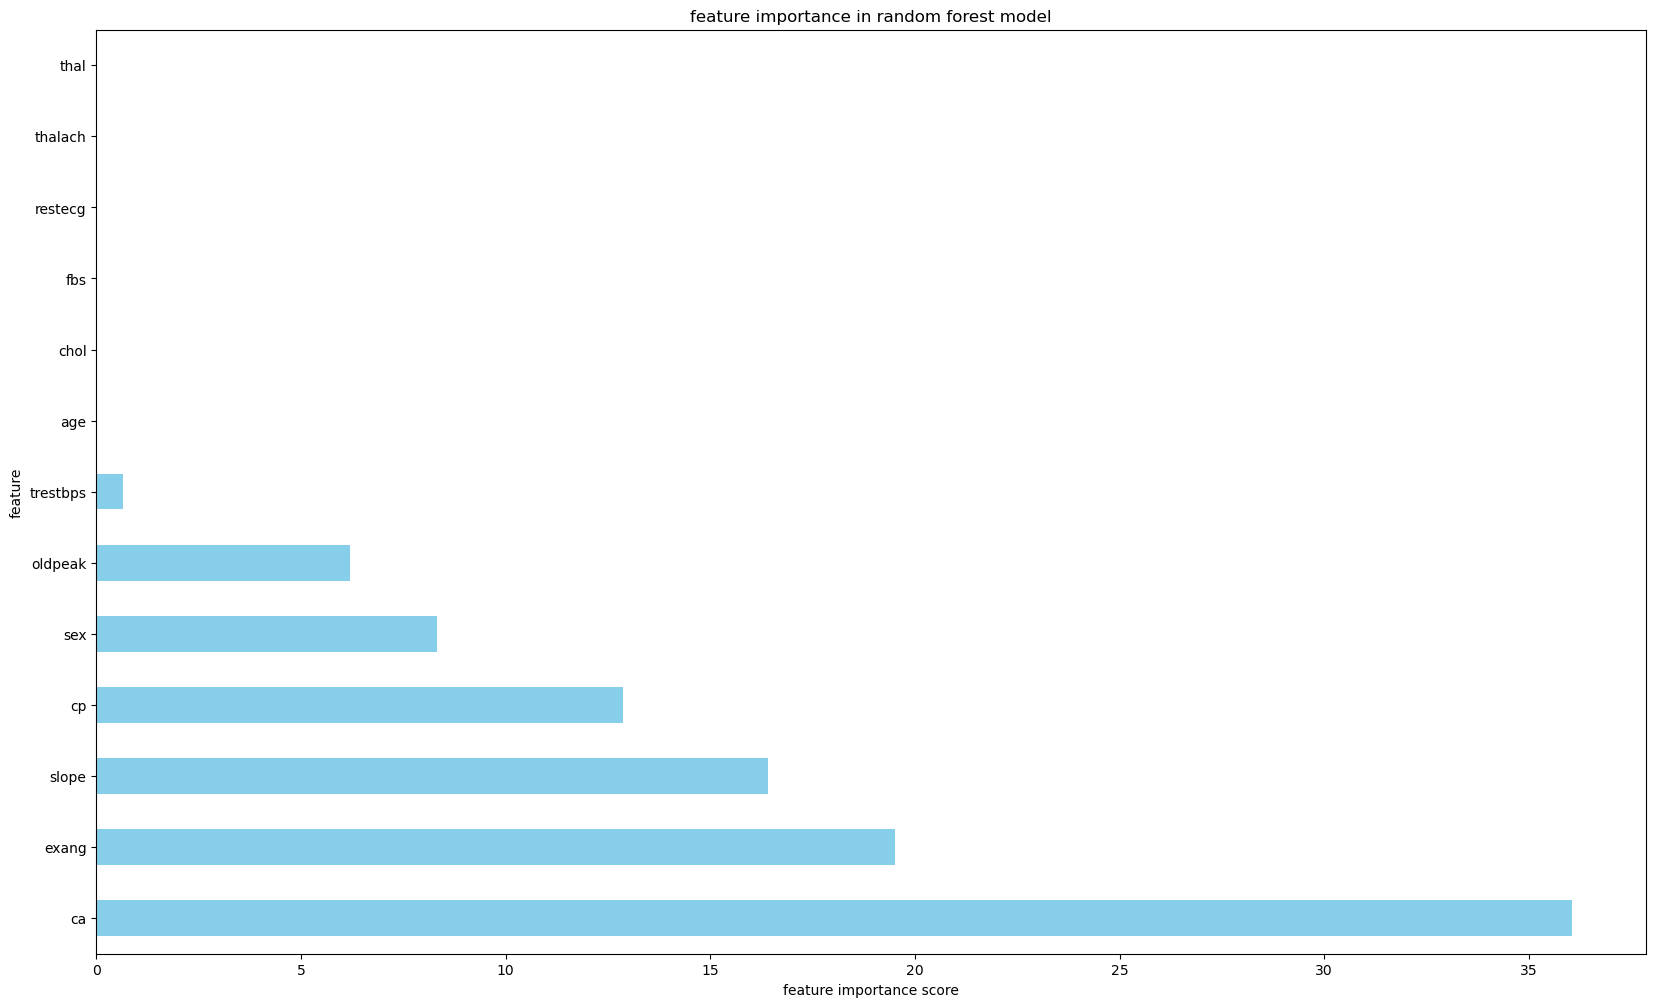

In [67]:
x_train = pd.DataFrame(x_train_sm)
feature_importances = pd.Series(catboost_model.feature_importances_ , index=x_train_sm.columns)
feature_importances.sort_values(ascending=False).plot(kind='barh', color = 'skyblue', figsize=(20, 12))
plt.xlabel('feature importance score')
plt.ylabel('feature')
plt.title('feature importance in random forest model')

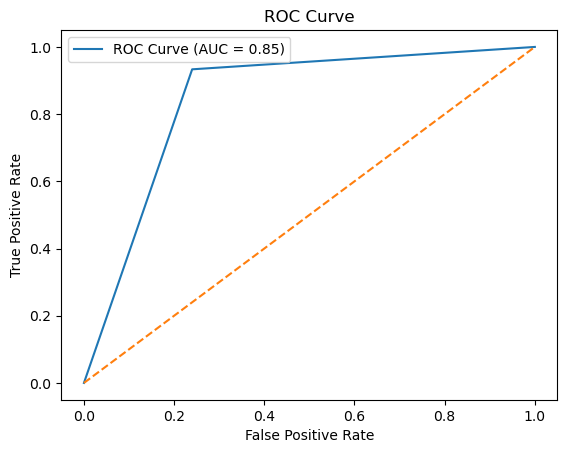

In [72]:
y_probs = catboost_model.predict_proba(x_test)[:,1]
y_pred = (y_probs > 0.5).astype(int)
fpr, tpr, _ = roc_curve(y_true=y_test, y_score=y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

<font size="3">save bestmodel and scaler for prediction new data</font>

In [35]:
with open('catboost_model.txt', 'wb') as file:
    pickle.dump(catboost_model , file)
with open('svc_Model.txt', 'wb') as file:
    pickle.dump(svc_model , file)
with open('scaler.txt', 'wb') as file:
    pickle.dump(scaler , file)

In [ ]:
from sklearn.linear_model import LogisticRegression


              precision    recall  f1-score   support

           0       0.92      0.82      0.87        28
           1       0.83      0.93      0.88        27

    accuracy                           0.87        55
   macro avg       0.88      0.87      0.87        55
weighted avg       0.88      0.87      0.87        55



C:\Users\T A T\AppData\Local\Temp\ipykernel_7988\2046710428.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x="Coefficient", y="Feature", palette="coolwarm")


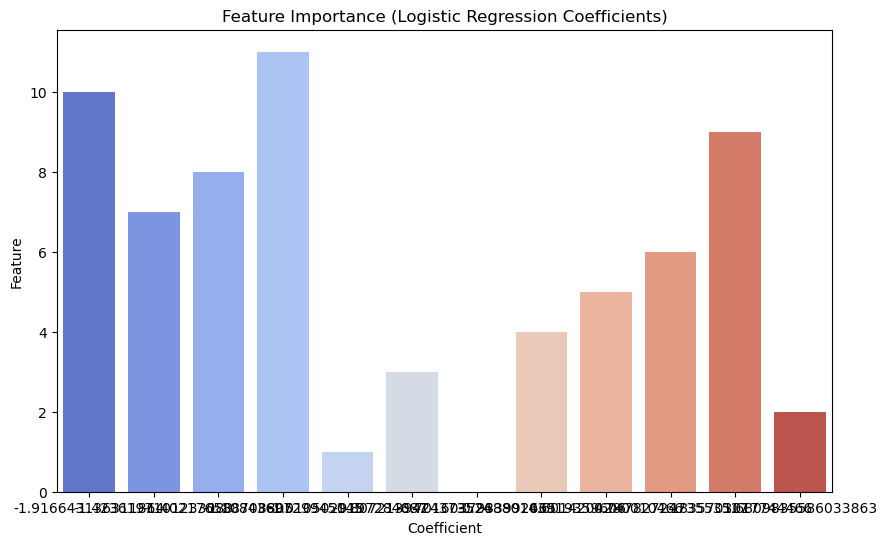

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt



model = LogisticRegression()
model.fit(x_train, y_train)

# Predictions
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

# Feature importances (coefficients)
coefficients = model.coef_[0]
features = x_train.columns
coef_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": coefficients
}).sort_values(by="Coefficient", key=abs, ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=coef_df, x="Coefficient", y="Feature", palette="coolwarm")
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.show()